In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.semi_supervised import LabelPropagation
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('df4.csv', encoding='ISO-8859-1')
df.head()

,cleaned_text,sentiment
0,what said,neutral
1,plus youve added commercials to the experience...,positive
2,i didnt today must mean i need to take another...,neutral
3,its really aggressive to blast obnoxious enter...,NaN
4,and its a really big bad thing about it,negative


In [3]:
X = df["cleaned_text"]
y = df["sentiment"]

In [4]:
y[y.isna()] = -1

In [5]:
X.fillna("",inplace=True)

In [6]:
y.isna().sum()

0

In [7]:
y = y.map({
    -1:-1,
    "negative":0,
    "neutral": 1,
    "positive": 2
})



In [8]:
X_labeled = X[y != -1]
y_labeled = y[y != -1]

X_unlabeled = X[y == -1]
y_unlabeled = y[y == -1]

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_labeled,y_labeled,test_size=0.2)
X_train = pd.concat([X_train,X_unlabeled])
y_train = pd.concat([y_train,y_unlabeled])

# Applying Label spreading with "rbf"

In [10]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("model",LabelSpreading(kernel="rbf"))
])

In [11]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('model', LabelSpreading())])

In [12]:
y_pred = model.predict(X_test)

In [13]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.6874943126181378


In [14]:
print(accuracy_score(y_test,y_pred))

0.6943653955606147


In [15]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      1099
           1       0.49      0.41      0.45       371
           2       0.57      0.56      0.57       287

    accuracy                           0.69      1757
   macro avg       0.61      0.60      0.61      1757
weighted avg       0.68      0.69      0.69      1757



## Applying Label spreading using "rbf"with Over-sampling using SMOTE

In [16]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("smote", SMOTE()),  # Over-sampling using SMOTE
    ("model",LabelSpreading(kernel="rbf"))
])

In [17]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE()),
                ('model', LabelSpreading())])

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.4702714204453684


In [20]:
print("Accuracy is : " , accuracy_score(y_test,y_pred))

Accuracy is :  0.4718269778030734


In [21]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.32      0.46      1099
           1       0.32      0.71      0.44       371
           2       0.42      0.76      0.54       287

    accuracy                           0.47      1757
   macro avg       0.53      0.60      0.48      1757
weighted avg       0.68      0.47      0.47      1757



# Applying Label spreading with "Knn"

In [22]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("model",LabelSpreading(kernel="knn"))
])

In [23]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LabelSpreading(kernel='knn'))])

In [24]:
y_pred = model.predict(X_test)

In [25]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.6978499916937267


In [26]:
print(accuracy_score(y_test,y_pred))

0.7057484348321001


In [27]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1099
           1       0.52      0.39      0.45       371
           2       0.56      0.61      0.58       287

    accuracy                           0.71      1757
   macro avg       0.62      0.61      0.61      1757
weighted avg       0.69      0.71      0.70      1757



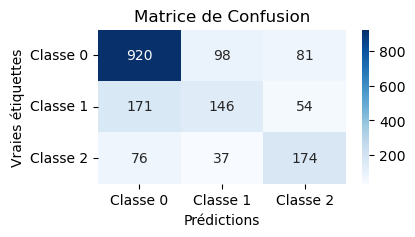

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Supposons que vous ayez déjà les prédictions y_pred et les vraies étiquettes y_test
# y_pred = model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Créer une heatmap avec seaborn
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1', 'Classe 2'], yticklabels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.show()


## Applying Label spreading using "knn" with Over-sampling using SMOTE

In [29]:
model = Pipeline(steps=[
    ("tfidf",TfidfVectorizer()),
    ("smote", SMOTE()),  # Over-sampling using SMOTE
    ("model",LabelSpreading(kernel="knn"))
])

In [30]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE()),
                ('model', LabelSpreading(kernel='knn'))])

In [31]:
y_pred = model.predict(X_test)

In [32]:
# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change the average parameter based on your needs
print("F1 Score is : ", f1) 

F1 Score is :  0.4874215036993903


In [33]:
print("Accuracy is : " , accuracy_score(y_test,y_pred))

Accuracy is :  0.4871940808195788


In [34]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.33      0.49      1099
           1       0.33      0.74      0.46       371
           2       0.40      0.76      0.53       287

    accuracy                           0.49      1757
   macro avg       0.55      0.61      0.49      1757
weighted avg       0.72      0.49      0.49      1757

